In [3]:
import cv2
import numpy as np
import os
import math
import matplotlib.pyplot as plt

In [4]:
raw_img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

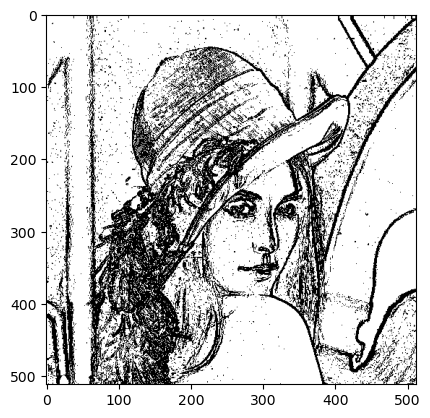

In [19]:
def Robert(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REFLECT)
    ker_1 = np.array([[-1, 0], [0, 1]])
    ker_2 = np.array([[0, -1], [1, 0]])
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            r1 = 0
            r2 = 0
            for krow in range(ker_1.shape[0]):
                for kcol in range(ker_1.shape[1]):
                    cor_row = row + krow
                    cor_col = col + kcol
                    r1 += ker_1[krow,kcol] * padded[cor_row, cor_col]
            for krow in range(ker_2.shape[0]):
                for kcol in range(ker_2.shape[1]):
                    cor_row = row + krow
                    cor_col = col + kcol
                    r2 += ker_2[krow,kcol] * padded[cor_row, cor_col]
            magnitude = math.sqrt(r1**2 + r2**2)
            if magnitude < threshold:
                res[row,col] = 255
    return res

img_a = Robert(raw_img,12)
plt.imshow(img_a,cmap='gray')
plt.imsave('problem_a.png',img_a,cmap='gray')

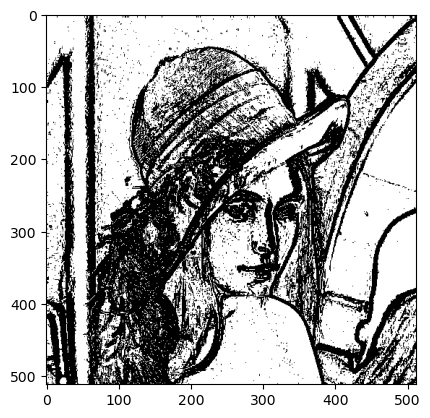

In [17]:
def Prewitt(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REFLECT)
    ker_1 = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    ker_2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    kernel_shift = -1
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            p1 = 0
            p2 = 0
            for krow in range(ker_1.shape[0]):
                for kcol in range(ker_1.shape[1]):
                    cor_row = row + krow + kernel_shift
                    cor_col = col + kcol + kernel_shift
                    p1 += ker_1[krow,kcol] * padded[cor_row, cor_col]
            for krow in range(ker_2.shape[0]):
                for kcol in range(ker_2.shape[1]):
                    cor_row = row + krow + kernel_shift
                    cor_col = col + kcol + kernel_shift
                    p2 += ker_2[krow,kcol] * padded[row + krow, col + kcol]
            magnitude = math.sqrt(p1**2 + p2**2)
            if magnitude < threshold:
                res[row,col] = 255
    return res

img_b = Prewitt(raw_img,24)
plt.imshow(img_b,cmap='gray')
plt.imsave('problem_b.png',img_b,cmap='gray')

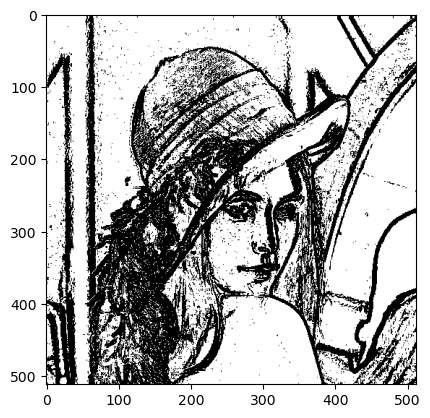

In [18]:
def Sobel(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REFLECT)
    ker_1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    ker_2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    kernel_shift = -1
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            p1 = 0
            p2 = 0
            for krow in range(ker_1.shape[0]):
                for kcol in range(ker_1.shape[1]):
                    cor_row = row + krow + kernel_shift
                    cor_col = col + kcol + kernel_shift
                    p1 += ker_1[krow,kcol] * padded[cor_row, cor_col]
            for krow in range(ker_2.shape[0]):
                for kcol in range(ker_2.shape[1]):
                    cor_row = row + krow + kernel_shift
                    cor_col = col + kcol + kernel_shift
                    p2 += ker_2[krow,kcol] * padded[row + krow, col + kcol]
            magnitude = math.sqrt(p1**2 + p2**2)
            if magnitude < threshold:
                res[row,col] = 255
    return res

img_c = Sobel(raw_img,38)
plt.imshow(img_c,cmap='gray')
plt.imsave('problem_c.png',img_c,cmap='gray')

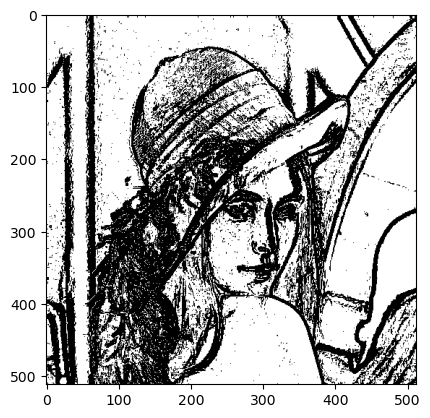

In [20]:
def Frei_and_Chen(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REFLECT)
    ker_1 = np.array([[-1,-math.sqrt(2),-1],[0,0,0],[1,math.sqrt(2),1]])
    ker_2 = np.array([[-1,0,1],[-math.sqrt(2),0,math.sqrt(2)],[-1,0,1]])
    kernel_shift = -1
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            p1 = 0
            p2 = 0
            for krow in range(ker_1.shape[0]):
                for kcol in range(ker_1.shape[1]):
                    cor_row = row + krow + kernel_shift
                    cor_col = col + kcol + kernel_shift
                    p1 += ker_1[krow,kcol] * padded[cor_row, cor_col]
            for krow in range(ker_2.shape[0]):
                for kcol in range(ker_2.shape[1]):
                    cor_row = row + krow + kernel_shift
                    cor_col = col + kcol + kernel_shift
                    p2 += ker_2[krow,kcol] * padded[row + krow, col + kcol]
            magnitude = math.sqrt(p1**2 + p2**2)
            if magnitude < threshold:
                res[row,col] = 255
    return res

img_d = Frei_and_Chen(raw_img,30)
plt.imshow(img_d,cmap='gray')
plt.imsave('problem_d.png',img_d,cmap='gray')

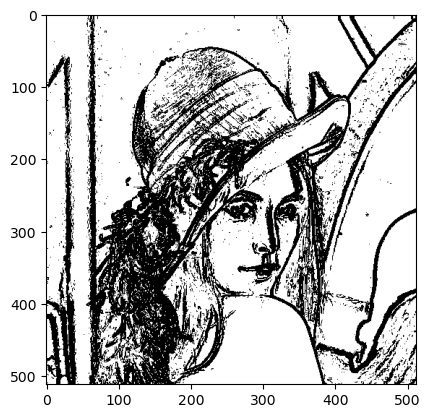

In [22]:
def Kirsch(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REFLECT)
    kernels = []
    kernels.append(np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]]))
    kernels.append(np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]]))
    kernels.append(np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]]))
    kernels.append(np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]]))
    kernels.append(np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]]))
    kernels.append(np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]]))
    kernels.append(np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]]))
    kernels.append(np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]]))
    kernel_shift = -1
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            maximum = 0
            for ker in kernels:
                magnitude = 0
                for krow in range(ker.shape[0]):
                    for kcol in range(ker.shape[1]):
                        cor_row = row + krow + kernel_shift
                        cor_col = col + kcol + kernel_shift
                        magnitude += ker[krow,kcol] * padded[cor_row, cor_col]
                maximum = max(magnitude,maximum)
            if maximum < threshold:
                res[row,col] = 255
    return res

img_e = Kirsch(raw_img,135)
plt.imshow(img_e,cmap='gray')
plt.imsave('problem_e.png',img_e,cmap='gray')

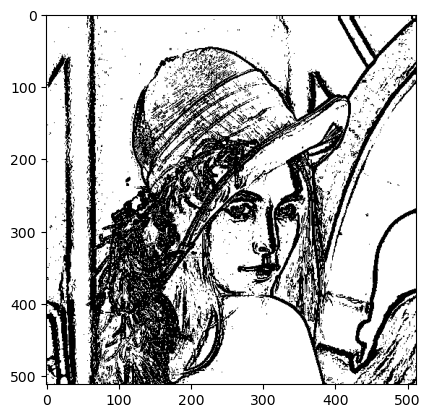

In [23]:
def Robinson(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REFLECT)
    kernels = []
    kernels.append(np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
    kernels.append(np.array([[0, 1, 2],[-1, 0, 1],[-2, -1, 0]]))
    kernels.append(np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]]))
    kernels.append(np.array([[2, 1, 0],[1, 0, -1],[0, -1, -2]]))
    kernels.append(np.array([[1, 0 ,-1],[2, 0, -2],[1, 0, -1]]))
    kernels.append(np.array([[0, -1, -2],[1, 0, -1],[2, 1, 0]]))
    kernels.append(np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))
    kernels.append(np.array([[-2, -1, 0],[-1, 0, 1],[0, 1, 2]]))

    kernel_shift = -1
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            maximum = 0
            for ker in kernels:
                magnitude = 0
                for krow in range(ker.shape[0]):
                    for kcol in range(ker.shape[1]):
                        cor_row = row + krow + kernel_shift
                        cor_col = col + kcol + kernel_shift
                        magnitude += ker[krow,kcol] * padded[cor_row, cor_col]
                maximum = max(magnitude,maximum)
            if maximum < threshold:
                res[row,col] = 255
    return res

img_f = Robinson(raw_img,43)
plt.imshow(img_f,cmap='gray')
plt.imsave('problem_f.png',img_f,cmap='gray')

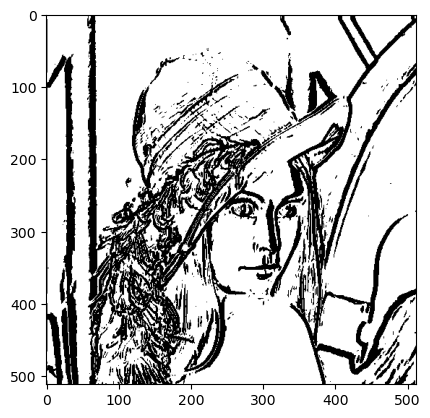

In [27]:
def Nevatia_Babu(img,threshold):
    res = np.zeros(img.shape)
    padded = cv2.copyMakeBorder(img,3,3,3,3,cv2.BORDER_REFLECT)
    kernels = []
    kernels.append(np.array([[100,100,100,100,100],[100,100,100,100,100],[0,0,0,0,0],[-100,-100,-100,-100,-100],[-100,-100,-100,-100,-100]]))
    kernels.append(np.array([[100,100,100,100,100],[100,100,100,78,-32],[100,92,0,-92,-100],[32,-78,-100,-100,-100],[-100,-100,-100,-100,-100]]))
    kernels.append(np.array([[100,100,100,32,-100],[100,100,92,-78,-100],[100,100,0,-100,-100],[100,78,-92,-100,-100],[100,-32,-100,-100,-100]]))
    kernels.append(np.array([[-100,-100,0,100,100],[-100,-100,0,100,100],[-100,-100,0,100,100],[-100,-100,0,100,100],[-100,-100,0,100,100]]))
    kernels.append(np.array([[-100,32,100,100,100],[-100,-78,92,100,100],[-100,-100,0,100,100],[-100,-100,-92,78,100],[-100,-100,-100,-32,100]]))
    kernels.append(np.array([[100,100,100,100,100],[-32,78,100,100,100],[-100,-92,0,92,100],[-100,-100,-100,-78,32],[-100,-100,-100,-100,-100]]))
    kernel_shift = -2
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            maximum = 0
            for ker in kernels:
                magnitude = 0
                for krow in range(ker.shape[0]):
                    for kcol in range(ker.shape[1]):
                        cor_row = row + krow + kernel_shift
                        cor_col = col + kcol + kernel_shift
                        magnitude += ker[krow,kcol] * padded[cor_row, cor_col]
                maximum = max(magnitude,maximum)
            if maximum < threshold:
                res[row,col] = 255
    return res

img_g = Nevatia_Babu(raw_img,12500)
plt.imshow(img_g,cmap='gray')
plt.imsave('problem_g.png',img_g,cmap='gray')